In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
%cd /home/stepan/kaggle/students_nure

/home/stepan/kaggle/students_nure


In [3]:
%ls

data/  parse/  prediction.csv  review/


In [4]:
%ls data/

parsed/  raw/  result.pdf


In [5]:
data_path = 'data/parsed/'
data_file = 'data.csv'

In [6]:
data = pd.read_csv(data_path + data_file, index_col=0)

In [7]:
data

,name,mark,group,additional_info,semester
0,Кудінова Анна Олександрівна,98.407,ПЗПІ-17-4 (анг),NaN,3
1,Ховрат Артем Вячеславович,98.112,ПЗПІ-17-3 (анг),NaN,3
2,Титаренко Степан Андрійович,97.846,ПЗПІ-17-3 (анг),NaN,3
3,Тесленко Денис Максимович,97.314,ПЗПІ-17-3 (анг),NaN,3
4,Лузан Микита Олександрович,96.95,ПЗПІ-17-1 (анг),NaN,3
...,...,...,...,...,...
192,Надиров Кирило Вадимович,не розраховується,ПЗПІ-17-9,контракт,6
193,Носов Олексій Валерійович,не розраховується,ПЗПІ-17-9,контракт,6
194,Перетяга Максим Юрійович,не розраховується,ПЗПІ-17-9,контракт,6
195,Полтавець Микита Юрійович,не розраховується,ПЗПІ-17-9,контракт,6


In [8]:
data.loc[:, 'mark'] = pd.to_numeric(data['mark'],errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 196
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1111 non-null   object 
 1   mark             528 non-null    float64
 2   group            1111 non-null   object 
 3   additional_info  583 non-null    object 
 4   semester         1111 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 52.1+ KB


In [10]:
data.describe()

,mark,semester
count,528.000000,1111.000000
mean,105.041373,2.799280
std,47.902106,2.266926
min,57.600000,0.000000
25%,74.080500,1.000000
50%,83.565000,3.000000
75%,96.429500,5.000000
max,200.000000,6.000000


In [11]:
semesters = data['semester'].sort_values().unique()
prev_sem = semesters[0]
for sem in semesters[1:]:
    was = len(data.loc[data['semester']==prev_sem, 'name'].unique())
    became = len(data.loc[data['semester']==sem, 'name'].unique())
    print(f'Lost from {prev_sem} to {sem}: {was - became}')
    prev_sem = sem

Lost from 0 to 1: 1
Lost from 1 to 3: 18
Lost from 3 to 5: 23
Lost from 5 to 6: 5


In [12]:
# pd.set_option('display.max_rows', len(data['name'].unique()))
gdata = pd.DataFrame(data.groupby(['name'])['mark'].sum()).sort_values('mark', ascending=False)
gdata['order'] = range(gdata.shape[0])

In [13]:
gdata

,mark,order
name,,
Ховрат Артем Вячеславович,587.327,0
Лузан Микита Олександрович,571.198,1
Кудінова Анна Олександрівна,570.288,2
Авдєєв Олексій Дмитрович,565.927,3
Гончар Ярослав Олександрович,562.360,4
...,...,...
Лейба Яна Алімівна,0.000,252
Литвиненко Юрій Олегович,0.000,253
Ілляшенко Ілля Сергійович,0.000,254


# Visualize

In [14]:
default_figsize = (13, 10)
plt.rcParams.update({'font.size': 18})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ПЗПІ-17-4 (анг)'),
  Text(1, 0, 'ПЗПІ-17-3 (анг)'),
  Text(2, 0, 'ПЗПІ-17-1 (анг)'),
  Text(3, 0, 'ПЗПІ-17-2 (анг)'),
  Text(4, 0, 'ПЗПІ-17-9'),
  Text(5, 0, 'ПЗПІ-17-10'),
  Text(6, 0, 'ПЗПІ-17-5'),
  Text(7, 0, 'ПЗПІ-17-6'),
  Text(8, 0, 'ПЗПІ-17-8'),
  Text(9, 0, 'ПЗПІ-17-7')])

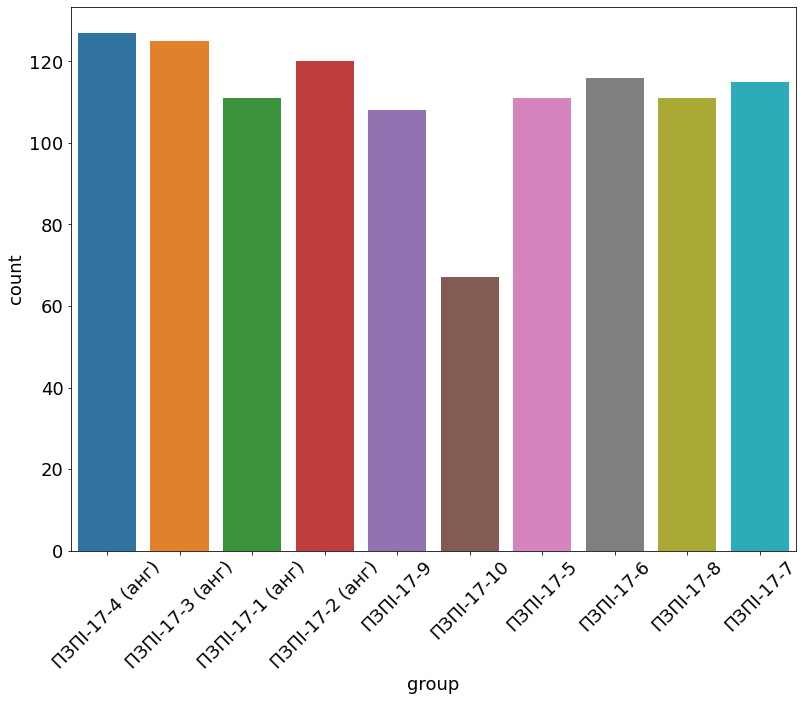

In [15]:
plt.figure(figsize=default_figsize)
sns.countplot(data['group'])
plt.xticks(rotation=45)

<AxesSubplot:>

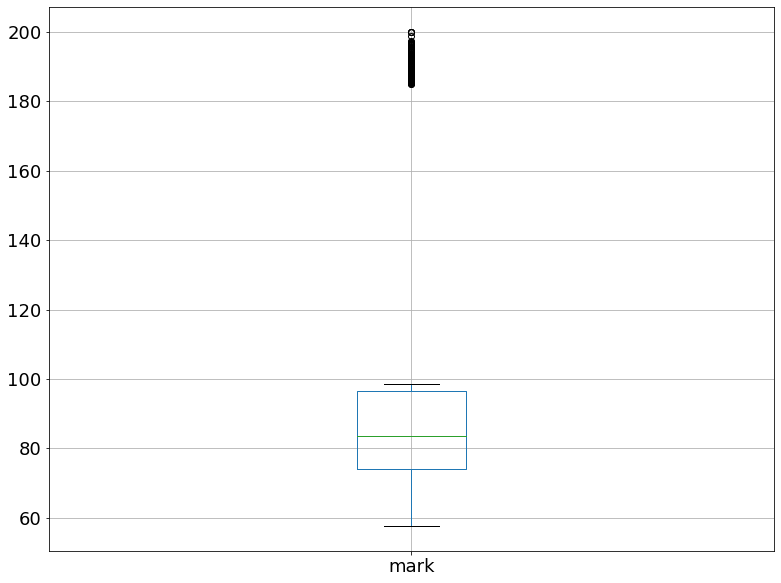

In [16]:
data.boxplot(figsize=default_figsize, column=['mark'])

<AxesSubplot:ylabel='additional_info'>

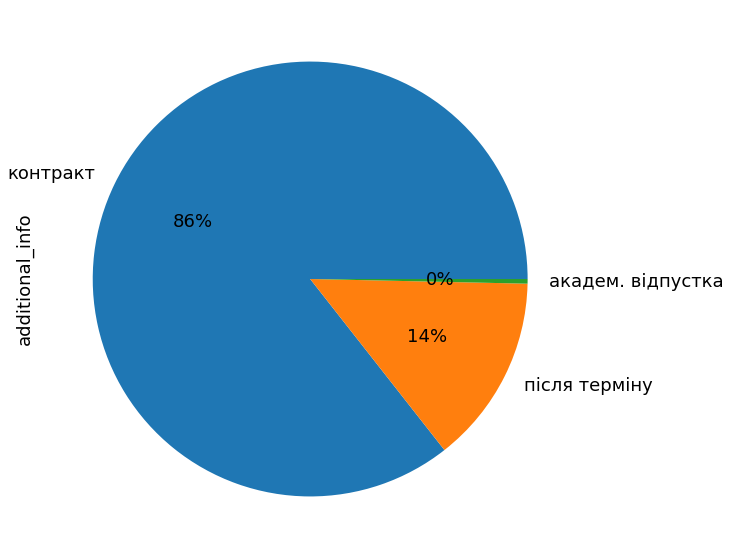

In [17]:
data['additional_info'].value_counts().plot.pie(figsize=default_figsize, autopct='%1.0f%%')

In [18]:
pd.DataFrame(data.groupby('group')['mark'].sum()).sort_values('mark', ascending=False) # easy ;)

,mark
group,
ПЗПІ-17-3 (анг),10551.222
ПЗПІ-17-4 (анг),8380.823
ПЗПІ-17-2 (анг),7815.334
ПЗПІ-17-1 (анг),6379.544
ПЗПІ-17-6,6149.748
ПЗПІ-17-7,5829.005
ПЗПІ-17-5,3564.202
ПЗПІ-17-8,2995.048
ПЗПІ-17-9,2416.679


# Transform data

In [19]:
def transform_marks(d):
    """
        ZNO marks should also be treated as 100 max, because they might distort the model otherwise        
    """
    d = d.copy()
    d.loc[d['mark'] > 100, 'mark'] -= 100 
    return d

In [20]:
tdata = transform_marks(data)
tdata.describe()

,mark,semester
count,528.000000,1111.000000
mean,81.745919,2.799280
std,10.023018,2.266926
min,57.600000,0.000000
25%,74.080500,1.000000
50%,83.565000,3.000000
75%,89.798250,5.000000
max,100.000000,6.000000


# Model of enrollment

### Preconditions:
    * 100 мест в магистратуре;
    * 15 из них бюджетные;
### Assumptions:
    * Колличество студентов, которые будут поступать на магистратуру - где-то между 1/3 и 1/4 от тех кто получит степень бакалавра;
    * На магистратуру пойдут преимущественно те, кто был в верхней части рейтинга ожидаемое соотношение порядка  80/20; 
### Target:
    * Математическая модель поступления потока ПЗПИ, которую можно будет сразу же и проверить

### Parameters (based on nothing):
    * В первом приближении рассмотрим модель, как некую линейную комбинацию элементарных функций;
    * Далее перейдем к более сложным вариантам;
    Model:
        - Пускай "желание" поступать в магистратуру ведет себя как:
$$w=\sum_{i\in S} \log{f(i)}$$

        где f(i) - характеристика успешности (будет задана позднее) в i-й семестр, n - количество семестров. 
        
$$ \text{Если } w \le 0 \text{ тогда студент в магистратуру не идет.} $$

        
        - Так как группы распределены не очень равнозначно (это можно видеть и по общим результатам групп выше), имеет смысл ввести некий коэффициент для выравнивания ситуации, так, пусть группы 5-10 имеют вес при поступлении на магистратуру c = 0.9 (не в обиду кому-то);
        - Так как у нас имеет место некоторая историческая информация, вместо учета позиции в рейтинге, возьмем среднее позиций в рейтинге за все семестры для каждого студента, как:
$$ P = \sum_{i\in S}\frac{S[i]}{|S|} $$

        - Вычислим среднее оценок студента студента, воспользуемся мы экспонентой этой величины:
        
$$ X = \sum_{i\in S}\frac{R[i]}{|S|} $$

        гдe S - множество семестров, S[i] - позиция в рейтинге в i-ом семестре, R[i] - оценка в i-ом семестре. 
    
$$ f(i) = (R[i] + P)^2 $$

        - Успешность можно задать следующим образом:
        
$$ J = e^{\frac{f(i)}{X}} $$
    
        - Ввдеем некую случайную величину, она будет задавать уровень неопределенности студента при поступлении. Так же учтет некоторые случайные факторы
        
$$ u=-tR\pi e^{\pi}, 0 \le R \le 1 $$

        - Так же у студентов с высокими балами есть большое искушение поступать в иностранные вузы, так что необходимо учесть и этот фактор, по своей механики вероятнее всего эта величина ведет себя экспоненциально, чем больше оценка, тем больше желание учиться за границей:
        
$$ M = -\frac{2^{\frac{X}{tP}}}{P} $$

        константа t здесь для того чтобы нормализовать порядок величин к тому, который не вызовет переполнение.

### Resulting equation:

$$ A = w u + J + M $$

In [21]:
tdata

,name,mark,group,additional_info,semester
0,Кудінова Анна Олександрівна,98.407,ПЗПІ-17-4 (анг),NaN,3
1,Ховрат Артем Вячеславович,98.112,ПЗПІ-17-3 (анг),NaN,3
2,Титаренко Степан Андрійович,97.846,ПЗПІ-17-3 (анг),NaN,3
3,Тесленко Денис Максимович,97.314,ПЗПІ-17-3 (анг),NaN,3
4,Лузан Микита Олександрович,96.950,ПЗПІ-17-1 (анг),NaN,3
...,...,...,...,...,...
192,Надиров Кирило Вадимович,NaN,ПЗПІ-17-9,контракт,6
193,Носов Олексій Валерійович,NaN,ПЗПІ-17-9,контракт,6
194,Перетяга Максим Юрійович,NaN,ПЗПІ-17-9,контракт,6
195,Полтавець Микита Юрійович,NaN,ПЗПІ-17-9,контракт,6


In [22]:
import math
import random

def init_model_elementary(d):
    def f(i, X, P):
        return (X + P)**2
    t = 10
    
    d = d.copy()
    md = d.groupby(['name', 'semester']).apply(
        lambda x: x.sort_values(['mark'], ascending=False)).reset_index(2)
    md = md.rename(columns={'level_2': 'position'})
    result = pd.DataFrame()
    for val in md.index.get_level_values(0).unique():
        P = md.loc[val, 'position'].mean()
        X = md.loc[val, 'mark'].mean()
        R = random.uniform(0, 1)
        result.loc[val, 'P'] = P
        result.loc[val, 'X'] = X
        result.loc[val, 'M'] = - 2**(X / (t * P)) / P
        result.loc[val, 'w'] = 0
        result.loc[val, 'u'] = - math.pi * R
        for s, m in md.loc[val, ['semester', 'mark']].iterrows():
            f_i = f(s, m[0], P)
            lg = math.log(f_i)
            result.loc[val, 'w'] += lg
            result.loc[val, 'J'] = math.exp(f_i / (t * X))
    return result

In [23]:
t = init_model_elementary(tdata)
t

,P,X,M,w,u,J
Євтушенко Іван Ігорович,13.400000,92.04840,-0.120138,27.874776,-2.962184,1.505119e+00
Єфремов Олексій Анатолійович,160.500000,NaN,NaN,20.447933,-2.795112,NaN
Іваненко Вікторія Юріївна,18.000000,90.23440,-0.078638,30.385762,-1.833126,1.893331e+00
Іваненко Денис Андрійович,180.600000,NaN,NaN,52.126823,-1.960860,NaN
Іванікович Артур Ігорович,175.333333,NaN,NaN,31.045439,-0.227738,NaN
...,...,...,...,...,...,...
Яременко Валерій Сергійович,90.600000,74.57175,-0.011686,45.387335,-0.177512,2.719932e+05
Ярушников Євген Володимирович,58.000000,77.89220,-0.018923,41.101744,-2.388801,1.922025e+02
Яріш Владислав Юрійович,199.000000,NaN,NaN,21.183244,-1.380229,NaN
Яценко Ігор Станіславович,127.000000,NaN,NaN,9.735069,-0.790859,NaN


In [24]:
t['prediction'] = t['w'] * t['u'] + t['M'] + t['J']
t[t['prediction'] >= 0]

,P,X,M,w,u,J,prediction
Андрусевич Андрій Володимирович,96.4,72.717667,-0.010930,45.988889,-1.823809,1.829997e+06,1.829913e+06
Антоненко Данило Олексійович,63.4,81.722800,-0.017247,41.951068,-0.021782,3.626843e+02,3.617533e+02
Бадашко Олександра Олексіївна,80.2,75.709250,-0.013312,44.208715,-2.518264,1.829607e+04,1.818473e+04
Безродний Владислав В`Ячеславович,48.6,87.632750,-0.023315,39.425438,-0.048684,3.002045e+01,2.807774e+01
Богун Владислав Миколайович,59.0,81.048200,-0.018642,41.264573,-2.131756,1.836345e+02,9.564984e+01
...,...,...,...,...,...,...,...
Шульга Владислав Володимирович,86.4,73.681500,-0.012279,44.927952,-2.779159,1.077303e+05,1.076054e+05
Юзяк Даніїл Євгенійович,79.0,77.908500,-0.013554,44.063324,-0.785817,1.065409e+04,1.061945e+04
Яременко Валерій Сергійович,90.6,74.571750,-0.011686,45.387335,-0.177512,2.719932e+05,2.719851e+05
Ярушников Євген Володимирович,58.0,77.892200,-0.018923,41.101744,-2.388801,1.922025e+02,9.399970e+01


In [25]:
t[t['prediction'] >= 0].index

Index(['Андрусевич Андрій Володимирович', 'Антоненко Данило Олексійович',
       'Бадашко Олександра Олексіївна', 'Безродний Владислав В`Ячеславович',
       'Богун Владислав Миколайович', 'Буданцев Павло Михайлович',
       'Буряк Владислав Олександрович', 'Буценко Микита Олегович',
       'Білоус Владислав Віталійович', 'Величко Роман Віталійович',
       'Веретельник Дмитро Володимирович', 'Возгрива Ганна Юріївна',
       'Гончаров Дмитро Олександрович', 'Готвянський Микита Антонович',
       'Гриб Роман Владиславович', 'Гурова Юлія Володимирівна',
       'Довжий Максим Сергійович', 'Жданов Максим Олегович',
       'Жернова Марина Миколаївна', 'Зеленков Антон Андрійович',
       'Зеленська Юлія Дмитрівна', 'Калугін Віталій Вячеславович',
       'Кальницька Владислава Денисівна', 'Карплюк Дмитро Олегович',
       'Качанов Станіслав Андрійович', 'Київський Олександр Леонідович',
       'Клочко Ольга Юріївна', 'Ковальов Олександр Максимович',
       'Кодрул Руслан Едуардович', 'Колесни

In [26]:
t.loc[t['prediction'] >= 0, 'prediction'] = 1
t.loc[t['prediction'] < 0, 'prediction'] = 0

In [27]:
t.to_csv('prediction.csv')